<a href="https://colab.research.google.com/gith/blob/main/practica2_sis_recomendacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# > **1. Instalar e importar librerias**



In [2]:
!pip install pandas numpy scikit-surprise
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357292 sha256=c76f305d5bd3248a9ec8f66d42609d58c1af250bce4b4559e90c8f664dd0e4c1
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


**Importación de las librerias**

In [3]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from scipy.sparse import csr_matrix #Para crear la matriz usuario-pelicula

# 2. **Cargar el conjunto de datos y Presentar características**

In [4]:
#se clona el repositorio de github
!rm -rf practica1_SRC
!git clone https://github.com/mpjuarez/practica1_SRC.git


Cloning into 'practica1_SRC'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 33 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 1.08 MiB | 4.73 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [5]:
#Cargar el dataset de calificaciones, películas y presentar la cantidad de columnas y filas, así tambien los tipos de datos
calificaciones = pd.read_csv('practica1_SRC/ratings.csv')
peliculas = pd.read_csv('practica1_SRC/movies.csv')
print(peliculas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [6]:
print(calificaciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [7]:
# Muestra las primeras 10 filas de calificaciones
print("Primeras 10 filas de calificaciones:")
display(calificaciones.head(10))

# Muestra las primeras 10 filas de películas
print("\nPrimeras 10 filas de películas:")
display(peliculas.head(10))

Primeras 10 filas de calificaciones:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100



Primeras 10 filas de películas:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# **4** Cargar matriz usuario - película

In [8]:
#Matriz Usuario-Película: esto permite reorganizar las calificaciones en una estructura que conecta usuarios con películas.

#!pip install scipy
#from scipy.sparse import csr_matrix

# Crear la matriz usuario-película y llenar NaN con ceros
user_movie_matrix = calificaciones.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print(user_movie_matrix)

# Convertir la matriz a dispersa para mejorar la eficiencia, es decir ahorrar memoria y mejorar la velocidad
user_movie_sparse_matrix = csr_matrix(user_movie_matrix)




movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0   

movieId  9       10     

# **5. Calcular la matriz de similitud de Pearson**

In [9]:

#from scipy.sparse import csr_matrix
#import numpy as np

# Función para calcular la matriz de similitud de Pearson
def calcular_similitud_pearson(matrix):
    """
    Calcula la matriz de similitud de Pearson para una matriz de usuario-película.
    """
    # Obtener la matriz densa en caso de que  la matriz es dispersa, esto asegura que todas las operaciones matemáticas necesarias puedan realizarse sin problemas.
    matrix_dense = matrix.toarray() if hasattr(matrix, "toarray") else matrix

    # Calcular la media de las calificaciones para cada usuario, Para cada usuario, considerando únicamente los valores no nulos  es decir calificaciones reales
    user_means = np.mean(matrix_dense, axis=1, where=(matrix_dense != 0))

    # Restar la media de cada usuario para centrar las calificaciones.
    #A cada calificación de un usuario se le resta su media, para que todas las calificaciones sean relativas a su promedio personal
    #Esto permite comparar patrones de calificación en lugar de los valores absolutos.
    matrix_centered = np.where(matrix_dense != 0, matrix_dense - user_means[:, np.newaxis], 0)

    # Calcular similitud de Pearson
    #La similitud de Pearson se calcula como el cociente entre el numerador y el denominador
    #Si el denominador es cero (para evitar divisiones por cero), la similitud se establece como 0
    numerator = np.dot(matrix_centered, matrix_centered.T)
    denominator = np.sqrt(np.sum(matrix_centered ** 2, axis=1))[:, np.newaxis]
    denominator = np.dot(denominator, denominator.T)

    similarity = np.where(denominator != 0, numerator / denominator, 0)
    return similarity



# **6. Función para generar recomendaciones**

In [10]:
# Función para generar recomendaciones
def recomendar_peliculas_formateadas(user_id, matrix, movies, num_recommendations=5):
    """
    Recomienda películas mostrando el movieId como índice y el título desde el dataset real.
    """
    # Calcular la matriz de similitud de Pearson
    similarity_matrix = calcular_similitud_pearson(matrix)

    # Identificar los vecinos más cercanos
    user_index = user_id - 1  # Ajustar índice (IDs comienzan desde 1)
    user_similarities = similarity_matrix[user_index]
    neighbors = np.argsort(-user_similarities)[1:21]  # Ignorar el propio usuario, es decir el número de vecinos es e 10, se puede cambiar

    # Calcular puntajes ponderados para películas no vistas
    user_ratings = matrix[user_index].toarray().flatten()
    peliculas_no_vistas = np.where(user_ratings == 0)[0]

    recomendacion_scores = {}
    for pelicula in peliculas_no_vistas:
        score, suma_similitud = 0, 0
        for vecino in neighbors:
            vecino_similitud = user_similarities[vecino]
            vecino_rating = matrix[vecino, pelicula]
            if vecino_rating > 0:
                score += vecino_similitud * vecino_rating
                suma_similitud += vecino_similitud

        if suma_similitud > 0:
            recomendacion_scores[pelicula] = score / suma_similitud

    # Ordenar las películas por puntaje
  #Prioriza las películas con los puntajes más altos para recomendar las mejores opciones
    peliculas_recomendadas = sorted(recomendacion_scores.items(), key=lambda x: x[1], reverse=True)
    recomendaciones_ids = [movie_id for movie_id, _ in peliculas_recomendadas[:num_recommendations]]

    # Filtrar películas desde el dataset real y mantener el formato deseado
    recomendaciones = movies.set_index('movieId').loc[recomendaciones_ids][['title']]
    recomendaciones.index.name = 'movieId'
    return recomendaciones

    # Simular una matriz de usuario-película (usuarios: 80, películas: 80)
user_movie_matrix = csr_matrix(np.random.randint(0, 6, size=(607, len(peliculas.head(20)))))

# 8. Generar recomendaciones para un usuario

In [11]:
# Generar recomendaciones para un usuario
user_id = 1  # Usuario para el que se generarán recomendaciones
recomendaciones_formateadas = recomendar_peliculas_formateadas(user_id, user_movie_matrix, peliculas)

# Mostrar recomendaciones en el formato esperado
print(f"Recomendaciones para el usuario {user_id}:")
print(recomendaciones_formateadas)

Recomendaciones para el usuario 1:
                            title
movieId                          
3         Grumpier Old Men (1995)
4        Waiting to Exhale (1995)
9             Sudden Death (1995)


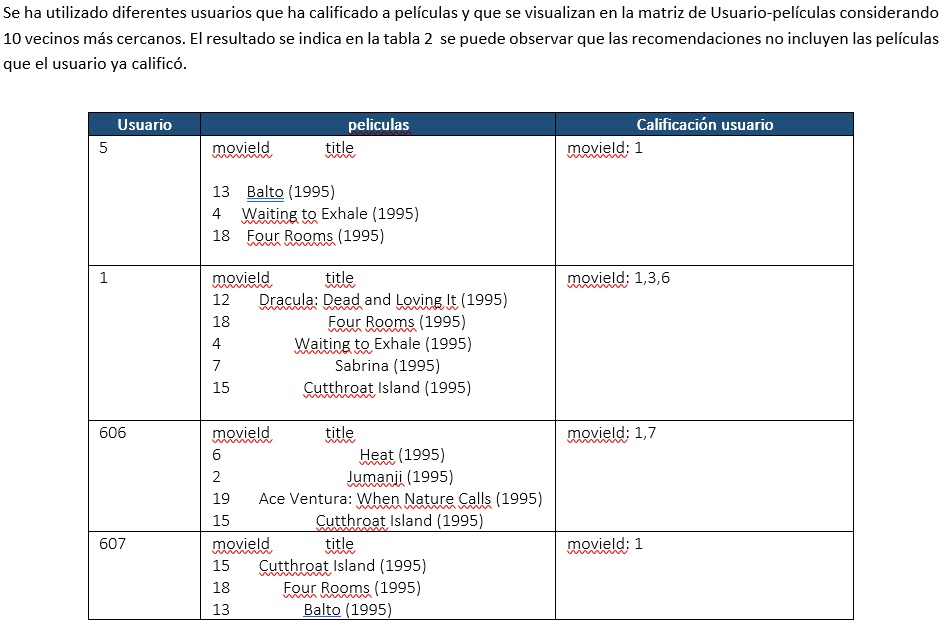

dasd

In [12]:
from sklearn.metrics import precision_score, recall_score

def calcular_precision_recall(recomendaciones, calificaciones, umbral=4.0):
    """
    Calcula precisión y recall para las recomendaciones dadas.

    recomendaciones: Lista de IDs de películas recomendadas.
    calificaciones: DataFrame con las calificaciones del usuario (contiene columnas 'movieId' y 'rating').
    umbral: Umbral para considerar una película como relevante (default: >= 4.0).
    """
    # Películas relevantes para el usuario
    relevantes = set(calificaciones[calificaciones['rating'] >= umbral]['movieId'])
    print("Películas relevantes:", relevantes)

    # Películas recomendadas
    recomendadas = set(recomendaciones)
    print("Recomendaciones:", recomendadas)

    # Calcular intersección
    relevantes_recomendadas = recomendadas.intersection(relevantes)
    print("Películas relevantes recomendadas:", relevantes_recomendadas)

    # Precisión
    precision = len(relevantes_recomendadas) / len(recomendadas) if recomendadas else 0

    # Recall
    recall = len(relevantes_recomendadas) / len(relevantes) if relevantes else 0

    return precision, recall


# Crear una copia explícita del DataFrame de calificaciones del usuario
calificaciones_usuario = calificaciones[calificaciones['userId'] == user_id].copy()

# Asegurar el formato correcto de los IDs
recomendaciones_sistema = [int(movie) for movie in recomendaciones_formateadas.index.tolist()]
calificaciones_usuario['movieId'] = calificaciones_usuario['movieId'].astype(int)

# Calcular precisión y recall
precision, recall = calcular_precision_recall(recomendaciones_sistema, calificaciones_usuario)
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Películas relevantes: {1024, 1, 1025, 3, 2048, 1029, 6, 1031, 1032, 2054, 2058, 2571, 527, 1552, 1042, 2580, 1049, 2078, 543, 3617, 1060, 1573, 2596, 552, 553, 2090, 2094, 47, 2096, 1073, 50, 1587, 2099, 3639, 1080, 2105, 2616, 1089, 1090, 2115, 1092, 2116, 2628, 1097, 3147, 590, 592, 593, 1617, 2640, 596, 1620, 2641, 2644, 2648, 1625, 2137, 2139, 3671, 2141, 2654, 2143, 608, 3168, 101, 1127, 110, 1136, 2161, 3702, 3703, 2174, 2692, 2700, 2193, 3729, 661, 151, 2716, 157, 3740, 3744, 163, 1196, 1197, 1198, 3253, 1206, 1208, 1210, 1213, 1214, 1220, 1732, 1222, 1224, 2761, 1226, 3273, 3793, 216, 1240, 2268, 733, 2273, 3809, 231, 1256, 235, 2797, 1265, 1777, 2291, 1270, 1275, 1278, 1793, 1282, 260, 2826, 1291, 1804, 1805, 1298, 2329, 804, 2858, 2353, 2872, 3386, 2366, 1348, 333, 2387, 2899, 2395, 349, 356, 2916, 2406, 362, 367, 3439, 3440, 3441, 3448, 3450, 2427, 1920, 2944, 2947, 2948, 2949, 1927, 2959, 2450, 919, 3479, 923, 2459, 3489, 1954, 2470, 4006, 2985, 2987, 940, 2478, 943, 1967, 